Importing dataset from kaggle

In [35]:
!cp kaggle.json ~/.kaggle

In [36]:
!kaggle datasets download -d mirichoi0218/insurance

insurance.zip: Skipping, found more recently modified local copy (use --force to force download)


In [37]:
!unzip /content/insurance.zip

Archive:  /content/insurance.zip
replace insurance.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Importing Libraries

In [241]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

Importing dataset

In [242]:
df=pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Data Preprocessing

In [243]:
df.shape

(1338, 7)

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [245]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [246]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [247]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [248]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Text(0.5, 1.0, 'Sex ratio')

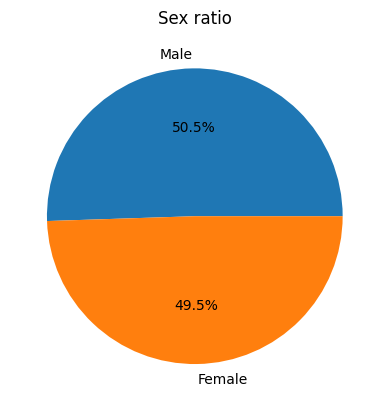

In [249]:
plt.pie(df.sex.value_counts(),labels=['Male','Female'],autopct='%1.1f%%')
plt.title("Sex ratio")

Text(0.5, 1.0, 'Smoker vs non smoker')

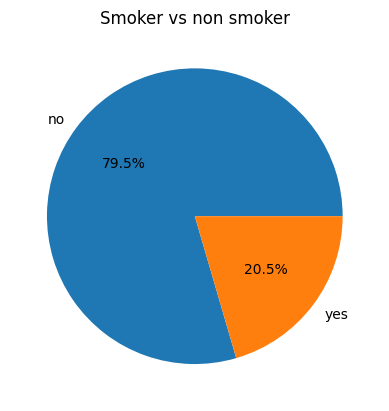

In [250]:
plt.pie(df.smoker.value_counts(),labels=['no','yes'],autopct='%1.1f%%')
plt.title("Smoker vs non smoker")

Text(0.5, 1.0, 'Regions in the US')

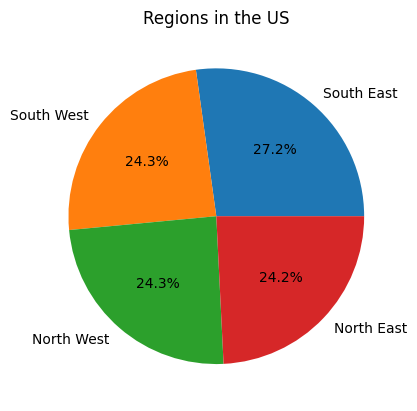

In [251]:
plt.pie(df.region.value_counts(),labels=['South East','South West','North West','North East'],autopct='%1.1f%%')
plt.title("Regions in the US")

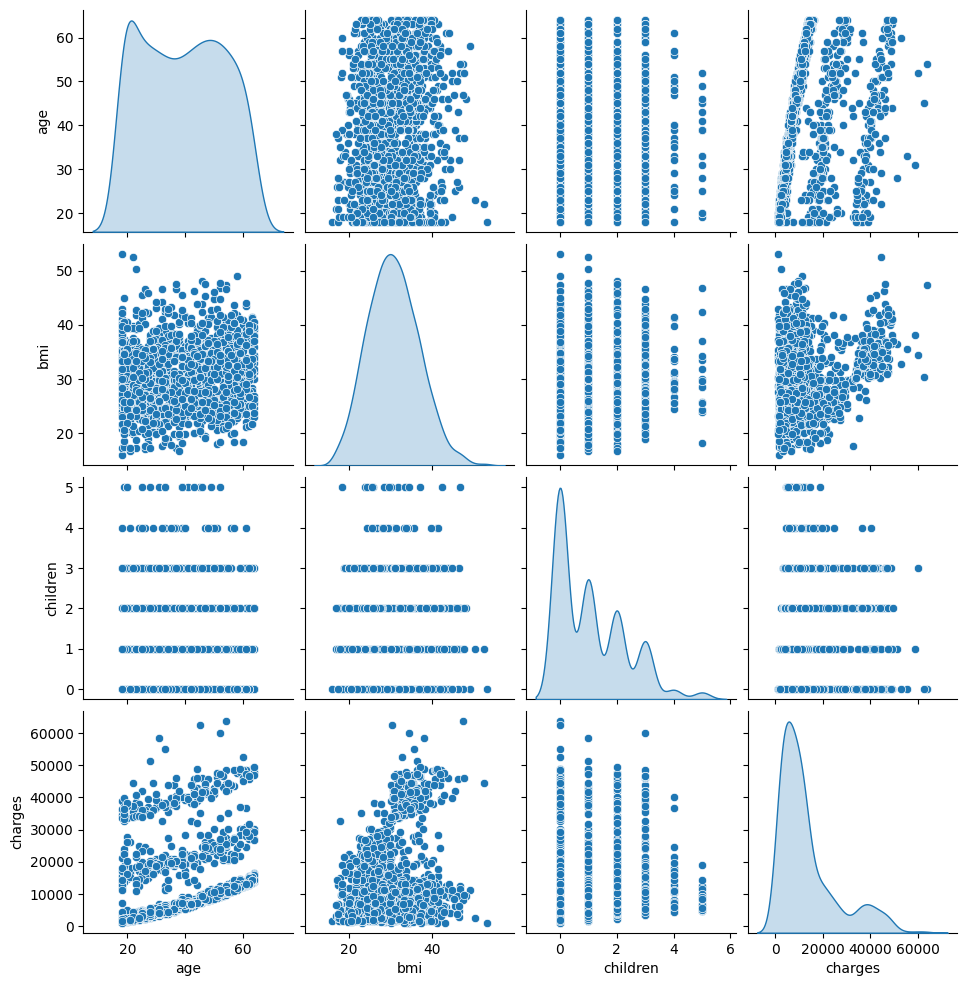

In [252]:
sns.pairplot(df, diag_kind='kde')
plt.show()

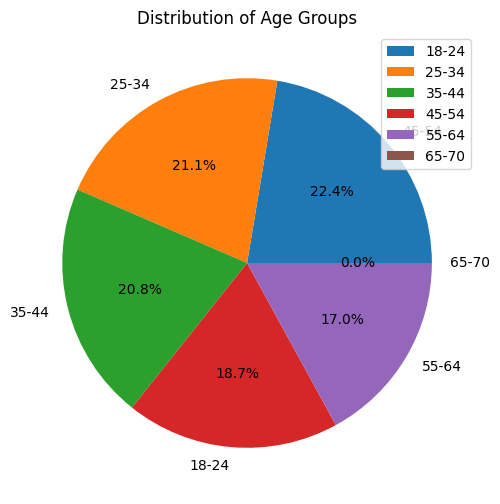

In [253]:
#create age groups
bin_edges = [18, 25, 35, 45, 55, 65, 70]
Age_group = pd.cut(df['age'], bins=bin_edges, labels=['18-24', '25-34', '35-44', '45-54', '55-64', '65-70'])
plt.figure(figsize=(8, 6))
plt.pie(Age_group.value_counts(), labels=Age_group.value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Age Groups')
plt.legend(['18-24', '25-34', '35-44', '45-54', '55-64', '65-70'])
plt.show()

Data Cleaning

Text(0.5, 1.0, 'Box Plot of All Columns')

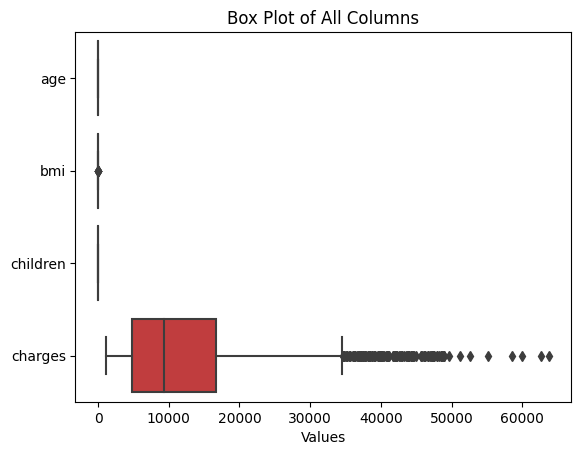

In [254]:
sns.boxplot(data=df, orient='h')

plt.xlabel('Values')
plt.title('Box Plot of All Columns')

In [255]:
l1=["age","bmi","children","charges"]
for i in l1:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    upperL=q3+1.5*iqr
    lowerL=q1-1.5*iqr
    df[i]=np.where(df[i]>upperL,upperL,np.where(df[i]<lowerL,lowerL,df[i]))

Text(0.5, 1.0, 'Box Plot of All Columns')

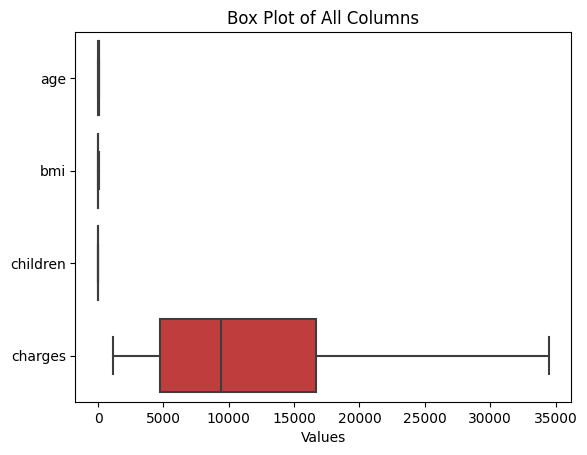

In [256]:
sns.boxplot(data=df, orient='h')

plt.xlabel('Values')
plt.title('Box Plot of All Columns')

Label Encoding

In [257]:
le =LabelEncoder()
df.sex=le.fit_transform(df.sex)
df.region=le.fit_transform(df.region)
df.smoker=le.fit_transform(df.smoker)
df['children'] = df['children'].astype(int)
df['age'] = df['age'].astype(int)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [258]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.650034,1.094918,0.204783,1.515695,12479.369251
std,14.049960,0.500160,6.056926,1.205493,0.403694,1.104885,10158.056096
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,47.290000,5.000000,1.000000,3.000000,34489.350562


In [259]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.111930,0.042469,-0.025019,0.002127,0.313394
sex,-0.020856,1.000000,0.044802,0.017163,0.076185,0.004588,0.052322
bmi,0.111930,0.044802,1.000000,0.013700,0.003146,0.157811,0.160996
children,0.042469,0.017163,0.013700,1.000000,0.007673,0.016569,0.073074
smoker,-0.025019,0.076185,0.003146,0.007673,1.000000,-0.002181,0.785958
region,0.002127,0.004588,0.157811,0.016569,-0.002181,1.000000,-0.016890
charges,0.313394,0.052322,0.160996,0.073074,0.785958,-0.016890,1.000000


<Axes: >

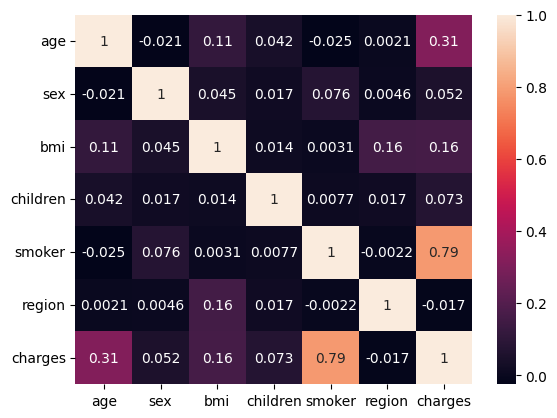

In [260]:
sns.heatmap(df.corr(),annot=True)

In [261]:
X=df.iloc[:,:-1]
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [262]:
y=df.charges
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

Scaling

In [263]:
scale=MinMaxScaler()

In [264]:
x_scaled=pd.DataFrame(scale.fit_transform(X),columns=X.columns)
x_scaled.head()

,age,sex,bmi,children,smoker,region
0,0.021739,0.0,0.381104,0.0,1.0,1.000000
1,0.000000,1.0,0.568465,0.2,0.0,0.666667
2,0.217391,1.0,0.543888,0.6,0.0,0.666667
3,0.326087,1.0,0.215289,0.0,0.0,0.333333
4,0.304348,1.0,0.412384,0.0,0.0,0.333333


Train - Test Split

In [265]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=0)

In [266]:
x_train.shape

(1070, 6)

In [267]:
x_test.shape

(268, 6)

Linear Regression

In [268]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [269]:
y_pred=lr.predict(x_test)
y_pred

array([10812.50219648,  9760.08237868, 32961.05644705, 14746.68529466,
        8085.69128878,  5165.97875296,  2567.73122807, 13296.13805955,
        8987.9896418 ,  7562.09326066,  5925.47081087, 10457.90744826,
        8690.93067673,  5041.03847626, 24708.69333902, 11030.54754009,
       11491.94283565,  6146.00908537,  8356.29404274, 23841.09160464,
       30255.06480035, 13468.43274137, 11341.15251591, 28887.27679091,
        4550.12139789,  8563.6879003 ,  2917.45915853,  9780.25245493,
        4890.39690857, 10226.32066355,  9119.26417391, 34917.65467992,
       14232.02584977, 12606.23906662, 22576.03238287,  5665.43538742,
       11840.60200826, 26526.56515303, 29456.89831018,  3729.75802033,
        5302.86864953,  4899.8357253 , 27275.59873434, 34476.03435186,
       24182.03159404,  5201.77768365, 10959.53507628,  8217.63567444,
        4799.17793557, 10892.02335748,  5553.50521914,  4142.91675367,
       29302.5976072 , 33585.95279233, 14557.8979321 ,  6816.45335723,
      

In [270]:
model1Accuracy=r2_score(y_test,y_pred)
model1Accuracy

0.7946067319137384

In [271]:
lr.predict([[0.217391,	1.0	,0.458434	,0.6	,0.0,	0.666667]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6448.34188876])

Gradient Boosing Regressor

In [272]:
gd_model = GradientBoostingRegressor()
gd_model.fit(x_train,y_train)

GradientBoostingRegressor()

In [273]:
y_prediction2 = gd_model.predict(x_test)

In [279]:
model2accuracy=r2_score(y_test,y_prediction2)
model2accuracy

0.8603333545276408

In [280]:
gd_model.predict([[0.217391,	1.0	,0.458434	,0.6	,0.0,	0.666667]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([6269.47595877])

Decision Tree Regressor

In [278]:
tree_model=DecisionTreeRegressor()
tree_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [283]:
y_prediction3 = tree_model.predict(x_test)

In [284]:
model3accuracy=r2_score(y_test,y_prediction3)
model3accuracy

0.5284707044659922

In [285]:
tree_model.predict([[0.217391,	1.0	,0.458434	,0.6	,0.0,	0.666667]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([5253.524])

Because the Accuracy of the Gradient Booster Regressor is more, We will use that Algorithm

In [286]:
import pickle

In [287]:
pickle.dump(gd_model,open('insuranceprediction.pkl','wb'))